 **read CSV file**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("/content/cars.csv",na_values=['N A',None])
#df['price'] = df['price'].astype(str).apply(lambda x: x if x.split()[0] in ['SAR','EGP','BHD','QAR','OMR','KWD','AED'] else np.nan)

df.isna().sum()


,0
car name,0
price,0
engine_capacity,0
cylinder,624
horse_power,0
top_speed,43
seats,103
brand,0
country,0


**find missing value**

In [ ]:

def validate_price(price_str):

    try:
        parts = price_str.split()
        parts[1] = parts[1].replace(',','')


        # Ensure there are exactly two parts, first is alphabetic, and second is numeric
        if  len(parts) == 2 and parts[0].isalpha() and parts[1].isdigit() :
            return True
    except:
      pass
        # Optional logging for debugging
    return False

# Apply the validation function to the DataFrame column
df['price'] = df['price'].apply(lambda x: np.nan if not validate_price(str(x)) else x)

df['cylinder'] = df['cylinder'].astype(str).apply(lambda x: x if x.isdigit() else np.nan)


df['horse_power'] = df['horse_power'].astype(str).apply(lambda x: x if x.isdigit() else np.nan)
df['horse_power'] = pd.to_numeric(df['horse_power'], errors='coerce')

df['seats'] = df['seats'].apply(lambda x: np.nan if not (len(str(x).split()) == 2 and (str(x)).split()[0].isdigit()) else x)
#df['seats'].fillna(df['seats'].mode()[0],inplace=True)

df["top_speed"] = pd.to_numeric(df["top_speed"], errors="coerce")

df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')



df.isna().sum()

,0
car name,0
price,1329
engine_capacity,3
cylinder,734
horse_power,122
top_speed,433
seats,519
brand,0
country,0


**clear missing value**

In [ ]:
df['seats'].fillna(df['seats'].mode()[0],inplace=True)
df['seats'] = df['seats'].apply(lambda x: int(x.split()[0]))

df['engine_capacity'].fillna(df['engine_capacity'].median(),inplace=True)

df["top_speed"].fillna(df["top_speed"].median(), inplace=True)

df["cylinder"] = pd.to_numeric(df["cylinder"], errors="coerce")
df['cylinder'].fillna(df['cylinder'].median(),inplace=True)
df['cylinder'] = df['cylinder'].astype(int)

df['horse_power'].fillna(df['horse_power'].median(),inplace=True)

df.dropna(subset=['price'], inplace=True)

df.isna().sum()


<ipython-input-3-7dedea8c705b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seats'].fillna(df['seats'].mode()[0],inplace=True)
<ipython-input-3-7dedea8c705b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
car name,0
price,0
engine_capacity,0
cylinder,0
horse_power,0
top_speed,0
seats,0
brand,0
country,0


**list found currency**

In [ ]:
list(df['price'].apply(lambda x: x.split()[0]).unique())

['SAR', 'EGP', 'BHD', 'QAR', 'OMR', 'KWD', 'AED']

**convert currency to usd**

In [ ]:

import pandas as pd


# Currency exchange rates to USD (example rates, these should be updated with real values)
exchange_rates = {
    'SAR': 0.27,  # 1 SAR = 0.27 USD
    'EGP': 0.032, # 1 EGP = 0.032 USD
    'BHD': 2.65,  # 1 BHD = 2.65 USD
    'QAR': 0.27,  # 1 QAR = 0.27 USD
    'OMR': 2.60,  # 1 OMR = 2.60 USD
    'KWD': 3.24,  # 1 KWD = 3.24 USD
    'AED': 0.27   # 1 AED = 0.27 USD
}

# Function to convert price to USD
def convert_to_usd(price_str):
    try:
        # Split into currency and value
        currency, value = price_str.split()
        # Remove commas from value and convert to float
        value = float(value.replace(',', ''))
        # Convert to USD using the exchange rate
        if currency in exchange_rates:
            return round(value * exchange_rates[currency], 2)
    except Exception as e:
        print(f"Error processing '{price_str}': {e}")
        return None
    return None

# Apply conversion to the 'price' column
df['price_usd'] = df['price'].apply(convert_to_usd)



**Normalize all numeric data**

In [ ]:

# Select only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data = numeric_data.drop(columns=['seats','cylinder'])
# normalize all nemric data
for column in numeric_data.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())



**Split the dataset into training, validation, and test set**

In [ ]:

X = df['horse_power'].values.reshape(-1,1)  # Drop price in SAR and target
Y = df["price_usd"]

# # One-hot encode categorical variables
# categorical_cols = ["car name", "brand", "country"]
# encoder = OneHotEncoder()
# X_categorical = encoder.fit_transform(X[categorical_cols]).toarray()

# # Combine with numerical features
# X_numerical = X.drop(columns=categorical_cols).values
# X_processed = np.hstack((X_numerical, X_categorical))

# # Standardize numerical features
# scaler = StandardScaler()
# X_processed = scaler.fit_transform(X_processed)

X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size=0.4)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5)

#Y_val = pd.to_numeric(Y_val, errors="coerce")



**calculate the mean absolute error, mean square error, and r2 score for all modules**

In [ ]:
# mean absolute error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

#linear regression
linear_model = LinearRegression()
linear_model.fit(X_train,Y_train)
linear_pridicts = linear_model.predict(X_val)
#mean avslute error
error = mean_absolute_error(linear_pridicts,Y_val)
print(f"mae for linear Resgression = {error:.5f}")
#mean square error
error = mean_squared_error(linear_pridicts,Y_val)
print(f"mse for linear Resgression = {error:.5f}")
# R_squard
error = r2_score(linear_pridicts,Y_val)
print(f"r2 score for linear Resgression = {error:.5f}")

print("\n")

#plnomyal regression
plnomyal_model = PolynomialFeatures(degree=2)
reg = LinearRegression()
reg.fit(plnomyal_model.fit_transform(X_train),Y_train)
plnomyal_pridicts = reg.predict(plnomyal_model.fit_transform(X_val))
#mean absolute error
error = mean_absolute_error(plnomyal_pridicts,Y_val)
print(f"mae for plnomyal Regression = {error:.5f}")
#mean square error
error = mean_squared_error(plnomyal_pridicts,Y_val)
print(f"mse for plnomyal Regression = {error:.5f}")
#r2_ score
error = r2_score(plnomyal_pridicts,Y_val)
print(f"r2 score for plnomyal Regression = {error:.5f}")

print("\n")

#lesso regression
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)
lasso_pridicts = lasso.predict(X_val)
#mean absolute error
error = mean_absolute_error(lasso_pridicts,Y_val)
print(f"mae for lasso Regression = {error:.5f}")
#mean square error
error = mean_squared_error(lasso_pridicts,Y_val)
print(f"mse for lasso Regression = {error:.5f}")
#r2_ score
error = r2_score(lasso_pridicts,Y_val)
print(f"r2 score for lasso Regression = {error:5.5f}")

print("\n")

#ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)
ridge_pridicts = ridge.predict(X_val)
#mean absolute error
error = mean_absolute_error(ridge_pridicts,Y_val)
print(f"mae for ridge Regression = {error:.5f}")
#mean square error
error = mean_squared_error(ridge_pridicts,Y_val)
print(f"mse for ridge Regression = {error:.5f}")
#r2_ score
error = r2_score(ridge_pridicts,Y_val)
print(f"r2 score for ridge Regression = {error:.5f}")

print("\n")

#kernel ridge regression

from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.5)  # alpha: regularization, gamma: kernel parameter
model.fit(X_train, Y_train)
model_pridicts = model.predict(X_val)
#mean absolute error
error = mean_absolute_error(model_pridicts,Y_val)
print(f"mae for model Regression = {error:.5f}")
#mean square error
error = mean_squared_error(model_pridicts,Y_val)
print(f"mse for model Regression = {error:.5f}")
#r2 score
error = r2_score(model_pridicts,Y_val)
print(f"r2 score for model Regression = {error:.5f}")



mae for linear Resgression = 0.00734
mse for linear Resgression = 0.00052
r2 score for linear Resgression = -1.55059


mae for plnomyal Regression = 0.00904
mse for plnomyal Regression = 0.00051
r2 score for plnomyal Regression = -0.22413


mae for lasso Regression = 0.01417
mse for lasso Regression = 0.00105
r2 score for lasso Regression = 0.00000


mae for ridge Regression = 0.00739
mse for ridge Regression = 0.00052
r2 score for ridge Regression = -1.69585


mae for model Regression = 0.00738
mse for model Regression = 0.00053
r2 score for model Regression = -1.57439


**Plot training data with validation data**

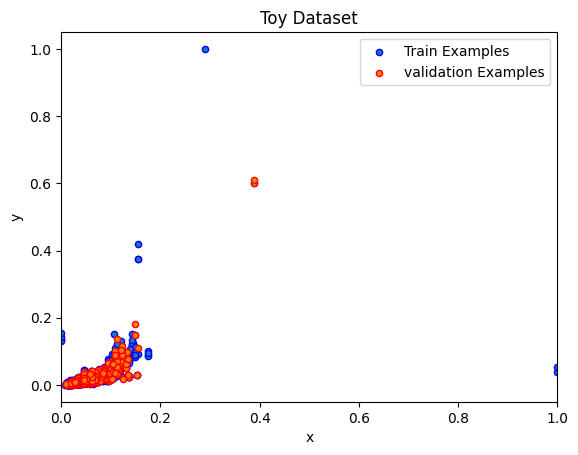

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100)

plt.scatter(X_train, Y_train, edgecolor="b", s=20, label="Train Examples")

plt.scatter(X_val, Y_val, edgecolor="r", s=20, label="validation Examples")

plt.xlabel("x")
plt.ylabel("y")

plt.xlim((0, 1))
#plt.ylim((-1.5, 1.5))

plt.legend(loc="best")

plt.title("Toy Dataset")
plt.show()

**linear regression model**

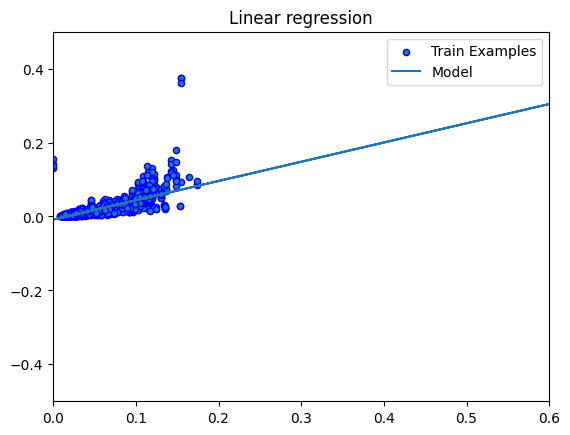

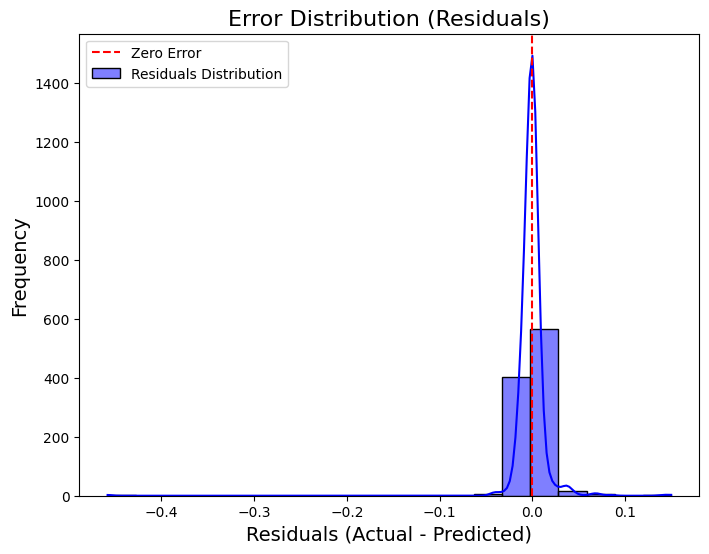

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
reg = LinearRegression()
reg.fit(X_train,Y_train)
y_predict  = reg.predict(X_val)

# Calculate residuals (errors)
residuals = Y_val - y_predict

plt.scatter(X_train, Y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(X_val, y_predict, label="Model")
plt.legend(loc="best")
plt.title("Linear regression")
plt.xlim((0, 0.6))
plt.ylim((-0.5, 0.5))
plt.show()

# --- Error Distribution Plot ---
plt.figure(figsize=(8, 6))

# Histogram
sns.histplot(residuals,  bins=20, color="blue", label="Residuals Distribution")

# Add labels and title
plt.title("Error Distribution (Residuals)", fontsize=16)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(0, color="red", linestyle="--", label="Zero Error")  # Reference line for zero error
plt.legend()
plt.show()

**lasso and ridge regression**

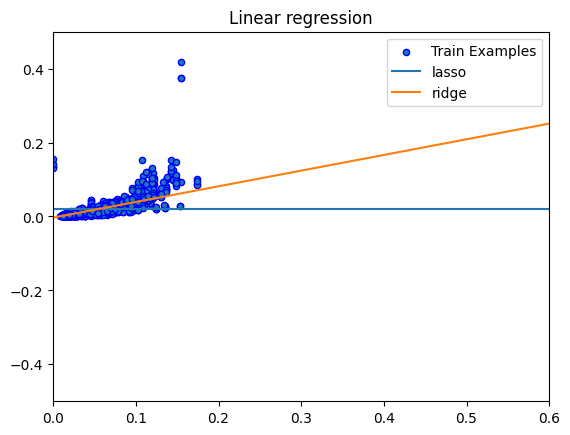

In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)

plt.scatter(X_train, Y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, lasso.predict(x[:, np.newaxis]), label="lasso")
plt.plot(x, ridge.predict(x[:, np.newaxis]), label="ridge")

plt.legend(loc="best")
plt.title("Linear regression")
plt.xlim((00, 0.6))
plt.ylim((-0.5, 0.5))
plt.show()

**Closed form solution**

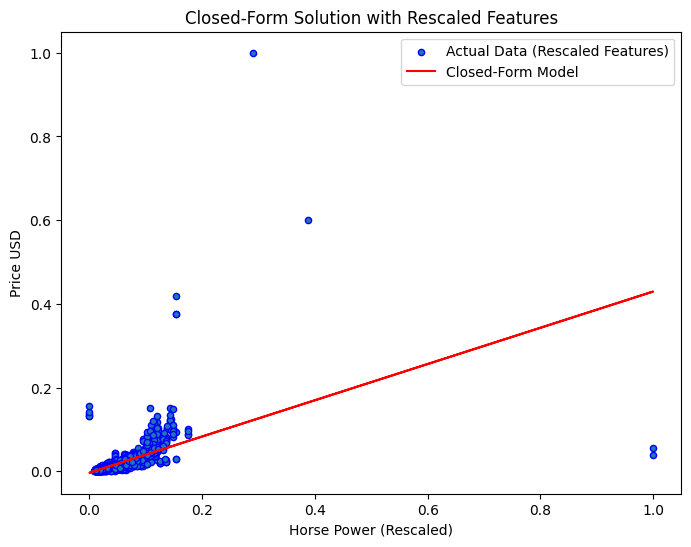

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Add a bias term to rescaled features
X_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))

# --- Closed-form solution ---
X_T_X = np.dot(X_bias.T, X_bias)
X_T_Y = np.dot(X_bias.T, Y_train)
theta_closed_form = np.linalg.inv(X_T_X).dot(X_T_Y)

# Predictions using closed-form
Y_pred_closed_form = np.dot(X_bias, theta_closed_form)

# --- Plotting Features with Predictions ---
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, edgecolor="blue", s=20, label="Actual Data (Rescaled Features)")
plt.plot(X_train, Y_pred_closed_form, color="red", label="Closed-Form Model")
plt.title("Closed-Form Solution with Rescaled Features")
plt.xlabel("Horse Power (Rescaled)")
plt.ylabel("Price USD")
plt.legend(loc="best")
plt.show()

**Non-linear regression**

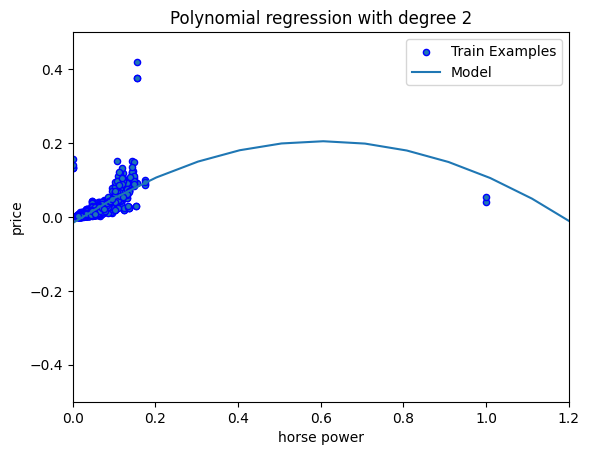

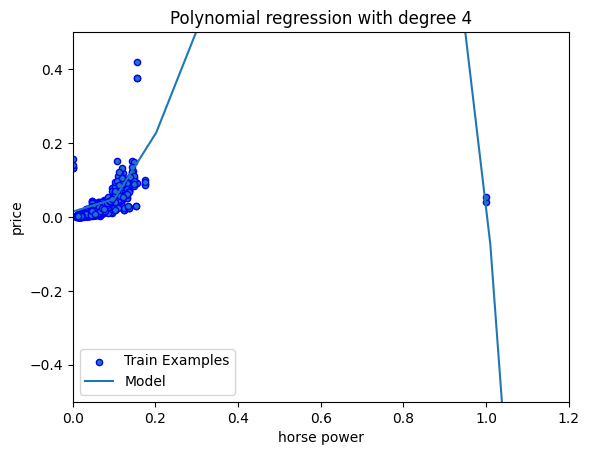

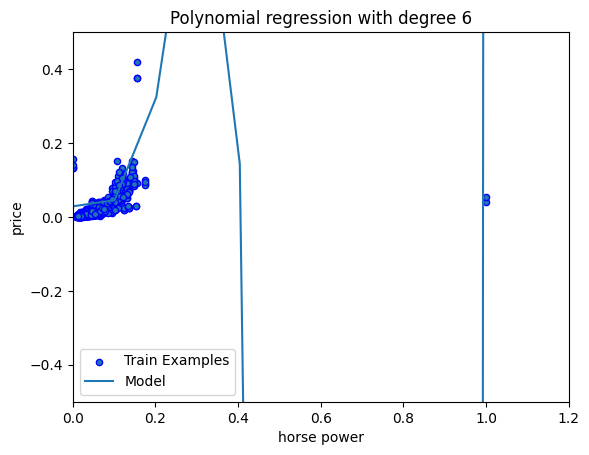

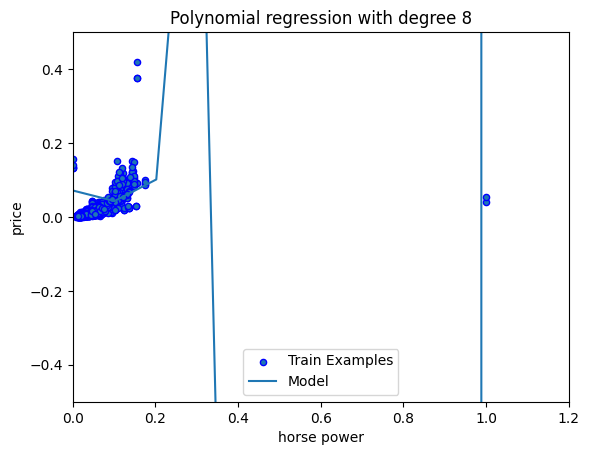

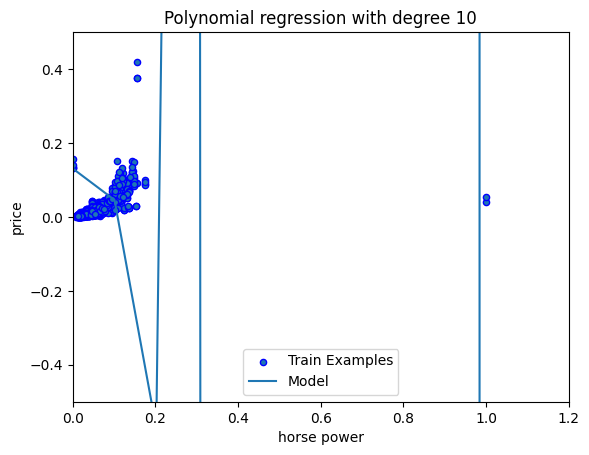

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for degree in [2,4,6,8,10]:
  polReg = PolynomialFeatures(degree=degree, include_bias=True)
  reg = LinearRegression()
  reg.fit(polReg.fit_transform(X_train),Y_train)
  plt.scatter(X_train, Y_train, edgecolor="b", s=20, label="Train Examples")
  plt.plot(x, reg.predict(polReg.fit_transform(x[:, np.newaxis])), label="Model",color ="red")
  plt.legend(loc="best")
  plt.title(f"Polynomial regression with degree {degree}")
  plt.xlim((0.0, 1.2))
  plt.ylim((-0.5, 0.5))
  plt.xlabel('horse power')
  plt.ylabel('price')
  plt.show()

**Model with Gaussian (RBF) kernel**

Mean Squared Error (MSE) on Test Set: 0.00063


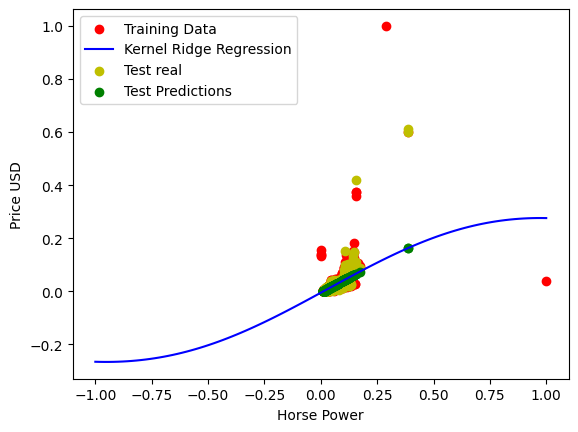

In [ ]:
# Model with Gaussian (RBF) kernel
from sklearn.kernel_ridge import KernelRidge
model = KernelRidge(kernel='rbf', alpha=1.0, gamma=0.5)  # alpha: regularization, gamma: kernel parameter
model.fit(X_train, Y_train)

# Predictions
y_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, y_pred)

print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.5f}")
# Visualization
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)  # Fine-grained range for smooth plot
y_plot = model.predict(X_plot)

plt.scatter(X_train, Y_train, color="red", label="Training Data")
plt.plot(X_plot, y_plot, label="Kernel Ridge Regression", color="blue")
plt.scatter(X_test, Y_test, color="y", label="Test real")
plt.scatter(X_test, y_pred, color="green", label="Test Predictions")
plt.xlabel("Horse Power")
plt.ylabel("Price USD")
plt.legend()
plt.show()

**Grid search**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor


# Define range of lambda (alpha) values
lambda_values = np.logspace(-4, 3, 50)  # 50 values from 10^-4 to 10^3

# Initialize Ridge regression
ridge = Ridge()
lasso = Lasso()
# Define model and hyperparameter grid
closed_form = SGDRegressor(max_iter=1000, tol=1e-3)
# Use Grid Search to find the best lambda
param_grid = {'alpha': lambda_values}
for model in [ridge,lasso,closed_form]:
  print(model)
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

  # Fit the model on the training data
  grid_search.fit(X_train, Y_train)

  # Extract the best lambda
  best_lambda = grid_search.best_params_['alpha']
  best_model = grid_search.best_estimator_

  # Evaluate on the validation set
  val_predictions = best_model.predict(X_val)
  val_error = mean_squared_error(Y_val, val_predictions)

  print(f"Optimal λ: {best_lambda:.5f}")
  print(f"Validation Error: {val_error:.5f}")

Ridge()
Optimal λ: 0.71969
Validation Error: 0.00031
Lasso()
Optimal λ: 0.00010
Validation Error: 0.00031
SGDRegressor()
Optimal λ: 0.00019
Validation Error: 0.00040


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


polReg = PolynomialFeatures(degree=2, include_bias=True)
reg = LinearRegression()
reg.fit(polReg.fit_transform(X_train),Y_train)
# Evaluate on valdation set
x_val_pred = reg.predict(polReg.fit_transform(X_val))
best_mse = mean_squared_error(Y_val, x_val_pred)


# Evaluate on the test set
x_test_pred = reg.predict(polReg.fit_transform(X_test))

# Calculate performance metrics
mse_test = mean_squared_error(Y_test, x_test_pred)
mae_test = mean_absolute_error(Y_test, x_test_pred)
r2_test = r2_score(Y_test, x_test_pred)

# Report metrics
print("Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test:.5f}")
print(f"Mean Absolute Error (MAE): {mae_test:.5f}")
print(f"R-squared (R²): {r2_test:.5f}")

# Compare with validation performance
print("\nValidation Set MSE Comparison:")
print(f"Validation MSE: {best_mse:.5f} vs Test MSE: {mse_test:.5f}")


Test Set Evaluation:
Mean Squared Error (MSE): 0.00024
Mean Absolute Error (MAE): 0.00847
R-squared (R²): 0.50967

Validation Set MSE Comparison:
Validation MSE: 0.00051 vs Test MSE: 0.00024


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x= df.drop(columns=["car name","price_usd",'price'])
X = pd.get_dummies(x, drop_first=True)
y = df["price_usd"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Forward Selection Function
def forward_selection(X_train, y_train, X_val, y_val):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_mse = float('inf')  # Start with a very high MSE
    model = LinearRegression()

    while remaining_features:
        feature_to_add = None

        for feature in remaining_features:
            # Test adding this feature
            features_to_test = selected_features + [feature]
            model.fit(X_train[features_to_test], y_train)
            y_pred = model.predict(X_val[features_to_test])
            mse = mean_squared_error(y_val, y_pred)
            formatted_value = float(format(mse, ".5f"))
            # Check if this is the best feature to add
            if formatted_value < best_mse:
                best_mse = formatted_value
                feature_to_add = feature

        if feature_to_add:
            selected_features.append(feature_to_add)
            remaining_features.remove(feature_to_add)
            print(f"Added feature: {feature_to_add}, MSE: {best_mse:.5f}")
        else:
            break  # No improvement

    return selected_features

# Perform forward selection
selected_features = forward_selection(X_train, y_train, X_val, y_val)

# Output final selected features
print("\nSelected Features:")
print(selected_features)


Added feature: horse_power, MSE: 0.00139
Added feature: top_speed, MSE: 0.00131
Added feature: brand_lotus, MSE: 0.00127
Added feature: cylinder, MSE: 0.00124
Added feature: brand_mclaren, MSE: 0.00120
Added feature: brand_dodge, MSE: 0.00119
Added feature: country_ksa, MSE: 0.00118

Selected Features:
['horse_power', 'top_speed', 'brand_lotus', 'cylinder', 'brand_mclaren', 'brand_dodge', 'country_ksa']
